In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

import math
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

from sklearn.preprocessing import PolynomialFeatures

In [24]:
df = pd.read_csv("city_united.csv")
df

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Quality of Life Index
0,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,...,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310,200.03
1,Raleigh,North Carolina,North America,6.1285,5.610,5.4970,5.157,1.7570,4.78425,8.671000,...,6.677333,7.1165,8.58375,6.5145,4.0620,7.9515,6.6130,7.5620,3.3905,197.30
2,Zurich,Switzerland,Europe,1.4730,1.000,6.2035,3.872,7.7335,5.83950,8.888000,...,7.670333,7.2875,8.64300,6.5520,6.4285,7.2675,4.9655,8.7845,5.4010,194.41
3,Wellington,New Zealand,Oceania,5.1345,5.161,2.4715,1.753,0.8525,6.03975,10.000000,...,8.078333,4.7560,9.60925,5.5055,5.9315,5.1745,4.5990,8.1160,6.3970,193.89
4,Charlotte,North Carolina,North America,5.5490,4.987,6.2480,2.878,3.6790,4.13400,8.671000,...,6.432333,3.6245,8.00925,6.5145,4.0620,6.3870,5.6060,6.7895,1.3115,193.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Delhi,India,Asia,9.7520,9.869,9.8285,9.099,5.6420,3.71225,3.618000,...,3.712667,0.5120,2.20300,5.5565,3.4145,3.5880,5.6830,3.1160,1.1785,69.56
183,Jakarta,Indonesia,Asia,8.6710,8.471,5.6495,6.437,2.4885,3.64000,4.028667,...,4.184000,1.0275,2.48575,4.6575,6.2660,4.4990,8.1460,2.0665,7.2020,68.46
184,Lagos,Nigeria,Africa,7.7670,9.098,6.4335,2.510,1.7480,3.56475,3.255667,...,2.862333,0.0000,1.90725,5.0610,6.2155,1.6340,1.3585,1.4060,3.8245,50.72
185,Manila,Philippines,Asia,8.5955,8.752,4.8050,3.547,2.6345,3.71300,4.592333,...,4.297667,0.0000,1.68300,5.0065,4.3030,4.6080,7.5840,5.5030,4.8255,41.88


In [25]:
df.duplicated().sum()

0

In [26]:
df.isna().sum()

UA_Name                  0
UA_Country               0
UA_Continent             0
Housing                  0
Cost of Living           0
Startups                 0
Venture Capital          0
Travel Connectivity      0
Commute                  0
Business Freedom         0
Safety                   0
Healthcare               0
Education                0
Environmental Quality    0
Economy                  0
Taxation                 0
Internet Access          0
Leisure & Culture        0
Tolerance                0
Outdoors                 0
Quality of Life Index    0
dtype: int64

Целевая переменная (target) - Quality of Life Index. Отметим, что в датасете присутствуют переменные различного типа.
Большая часть относится к числовым, но столбцы UA_Name, UA_Country и UA_Continent - к категориальным.

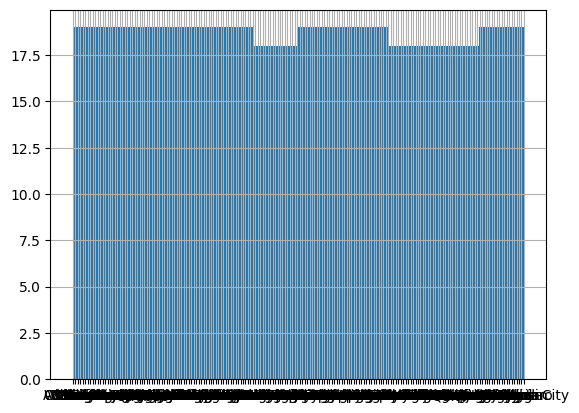

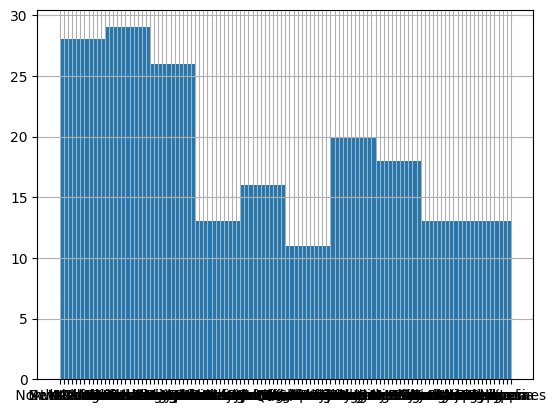

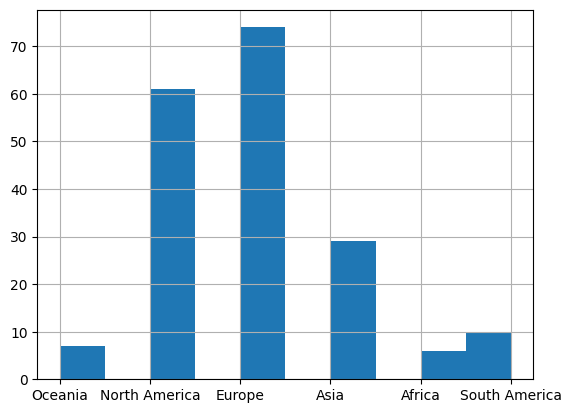

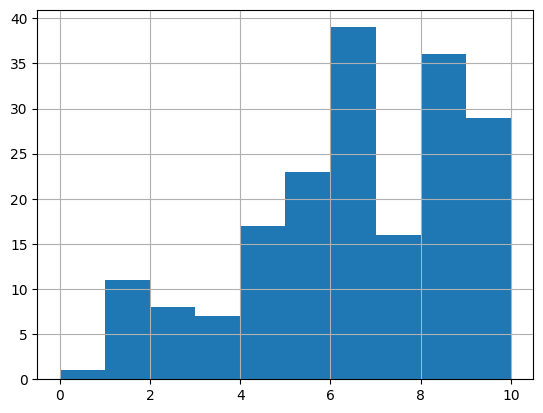

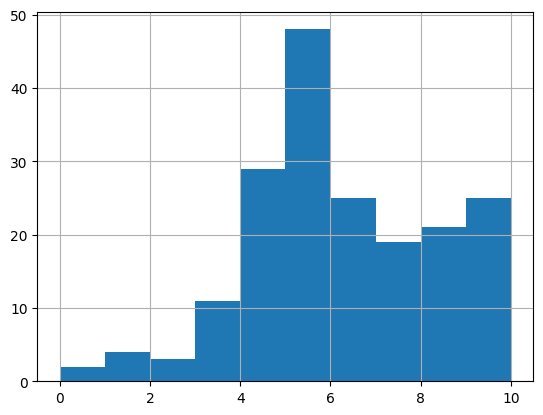

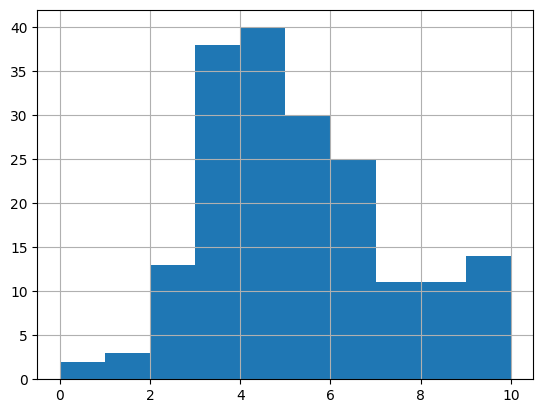

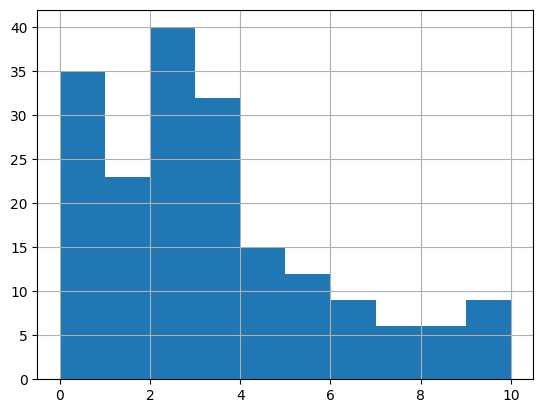

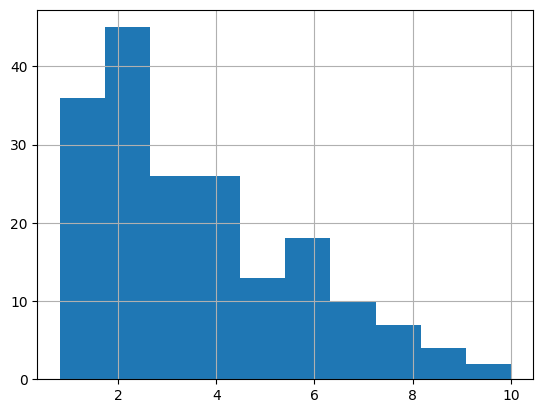

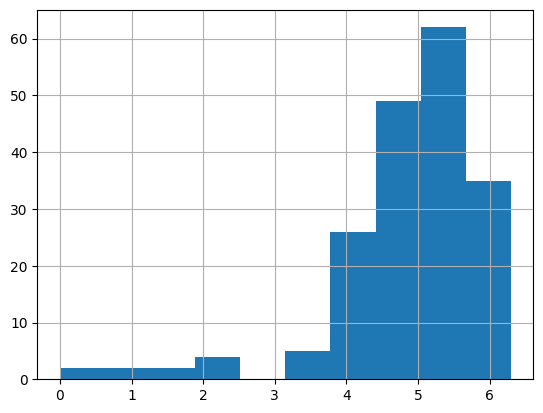

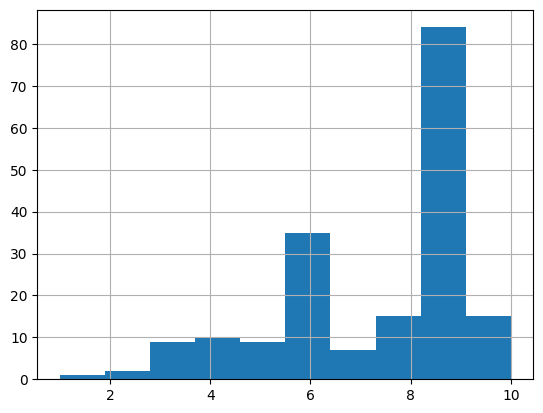

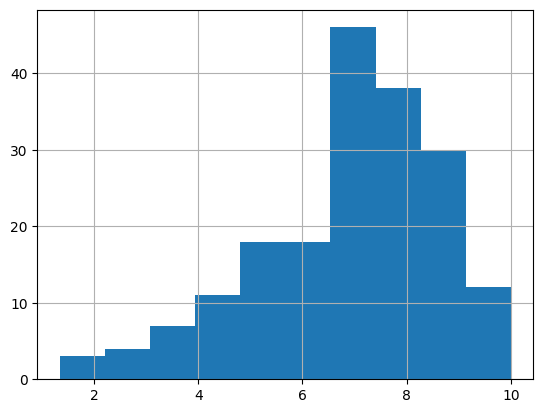

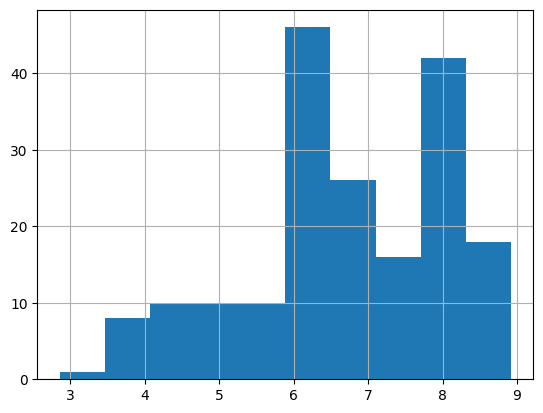

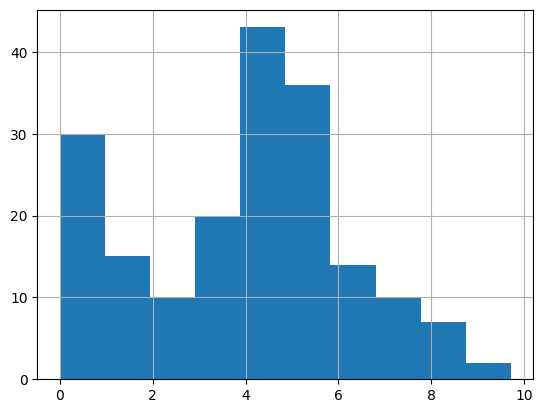

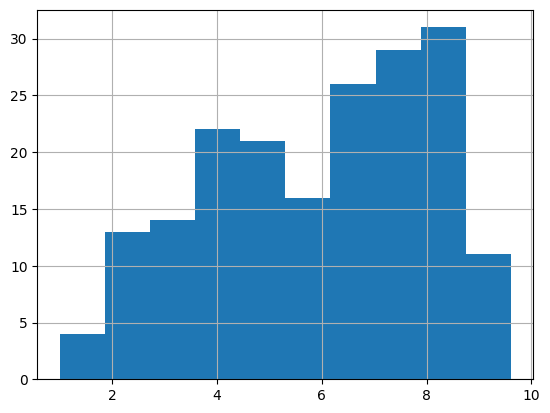

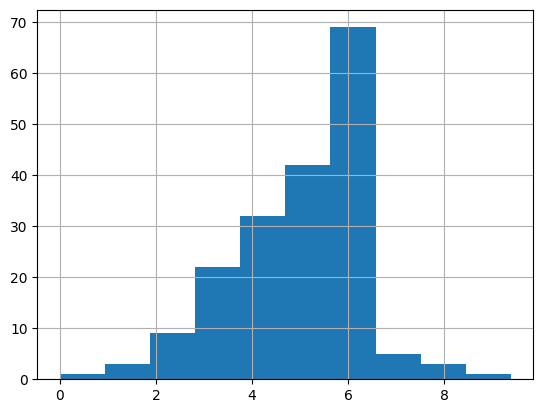

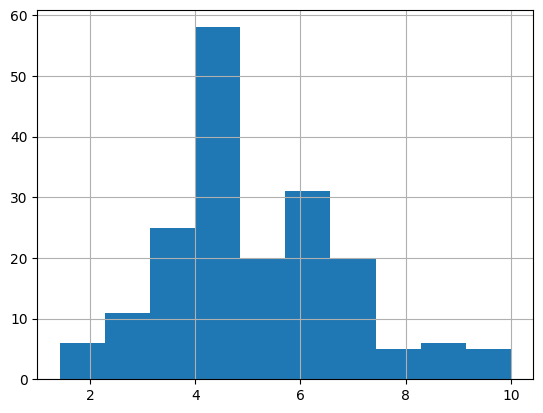

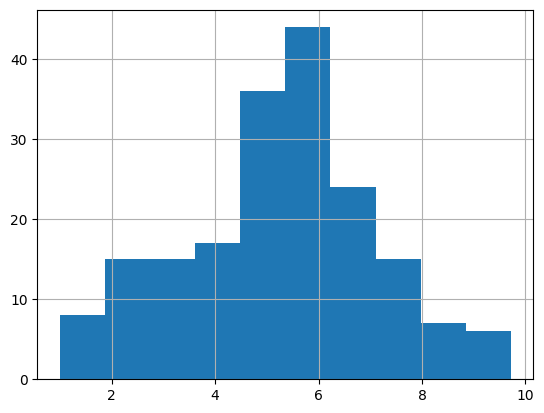

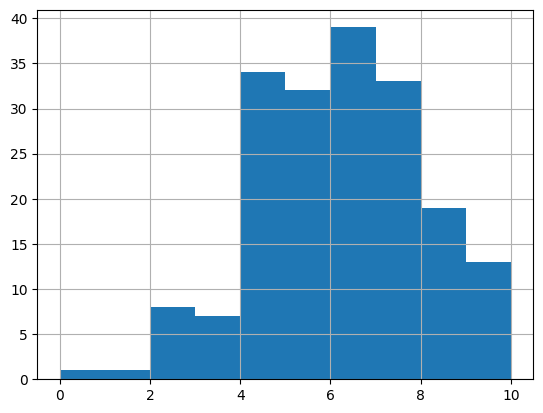

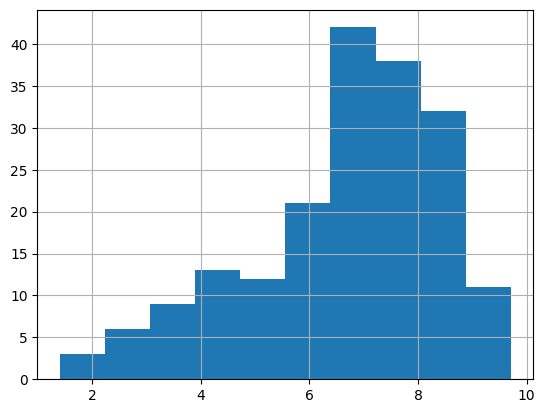

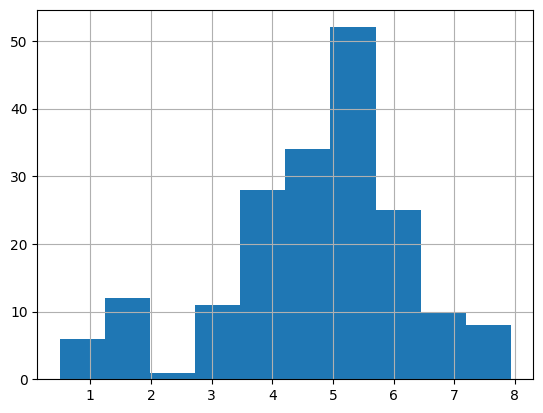

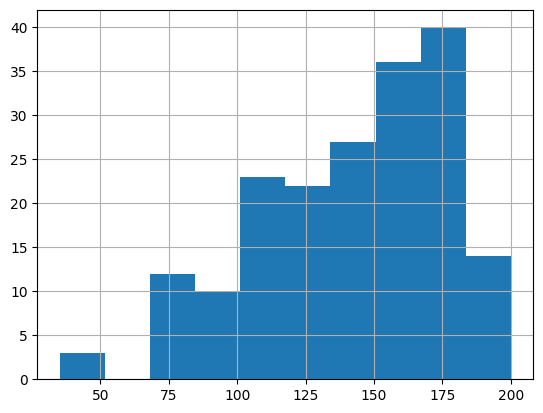

In [27]:
col = df.columns
for i in col:
    df[i].hist()
    plt.show()

Смотря на графики распределения хочется преобразовать некоторые столбцы, но этого не стоит делать, ведь их значения оцениваются примерно одинаково: по шкале от 0 до 10. Если и применять преобразование, то ко всем столбцам (не успела).

Категориальные будут дублировать друг друга: город соответствует конкретной стране и конкретному региону. Можно было бы ввести фиктивные по одной из них.

Поэтому пока что построим модель лишь с числовыми факторами и оценим, какой из них больше всего влияет на индекс. 

In [28]:
X = df.drop(["Quality of Life Index", "UA_Name", "UA_Country", "UA_Continent"], axis=1)
y = df[["Quality of Life Index"]]


In [29]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
#numerical = df.drop(["UA_Name", "UA_Country", "UA_Continent"], axis=1)

<Axes: >

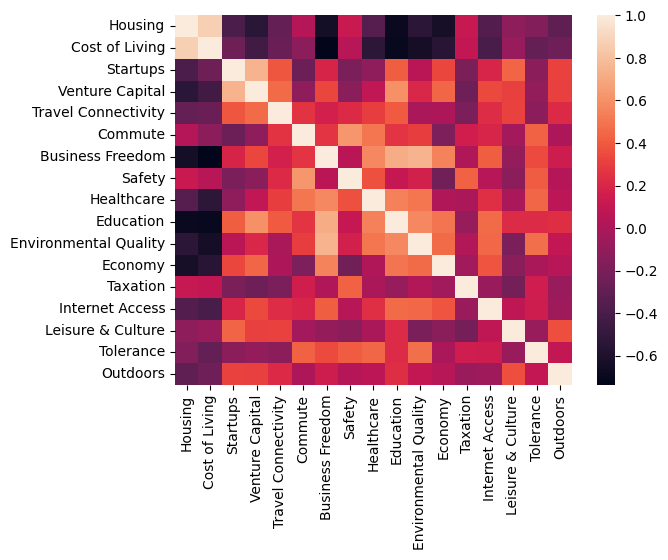

In [31]:
corr = X.corr(method='spearman') 
sns.heatmap(corr)

Высокая мультиколлинеарность

F-statistic

In [32]:
from sklearn.feature_selection import f_regression, SelectKBest

In [36]:
f_statistic, p_values = f_regression(train_X, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
sekector = SelectKBest(f_regression, k=17)
sekector.fit_transform(train_X, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[6.734 , 7.004 , 6.022 , ..., 7.8335, 9.597 , 5.691 ],
       [5.2245, 6.162 , 7.9345, ..., 7.144 , 5.34  , 5.386 ],
       [6.5555, 5.133 , 4.3575, ..., 5.3835, 4.8815, 1.266 ],
       ...,
       [2.1315, 6.183 , 2.6875, ..., 4.6205, 5.0625, 4.437 ],
       [4.9025, 9.82  , 3.0535, ..., 4.38  , 4.5505, 4.0985],
       [8.6965, 7.806 , 3.6915, ..., 5.8435, 2.909 , 0.5   ]])

In [41]:
X_F_result = sekector.get_feature_names_out()
X_F_result

array(['Housing', 'Cost of Living', 'Startups', 'Venture Capital',
       'Travel Connectivity', 'Commute', 'Business Freedom', 'Safety',
       'Healthcare', 'Education', 'Environmental Quality', 'Economy',
       'Taxation', 'Internet Access', 'Leisure & Culture', 'Tolerance',
       'Outdoors'], dtype=object)

In [40]:
X_F = df[X_F_result]
X_F

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310
1,6.1285,5.610,5.4970,5.157,1.7570,4.78425,8.671000,6.5225,6.677333,7.1165,8.58375,6.5145,4.0620,7.9515,6.6130,7.5620,3.3905
2,1.4730,1.000,6.2035,3.872,7.7335,5.83950,8.888000,9.0665,7.670333,7.2875,8.64300,6.5520,6.4285,7.2675,4.9655,8.7845,5.4010
3,5.1345,5.161,2.4715,1.753,0.8525,6.03975,10.000000,8.2230,8.078333,4.7560,9.60925,5.5055,5.9315,5.1745,4.5990,8.1160,6.3970
4,5.5490,4.987,6.2480,2.878,3.6790,4.13400,8.671000,5.3475,6.432333,3.6245,8.00925,6.5145,4.0620,6.3870,5.6060,6.7895,1.3115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,9.7520,9.869,9.8285,9.099,5.6420,3.71225,3.618000,6.4185,3.712667,0.5120,2.20300,5.5565,3.4145,3.5880,5.6830,3.1160,1.1785
183,8.6710,8.471,5.6495,6.437,2.4885,3.64000,4.028667,7.0005,4.184000,1.0275,2.48575,4.6575,6.2660,4.4990,8.1460,2.0665,7.2020
184,7.7670,9.098,6.4335,2.510,1.7480,3.56475,3.255667,5.9995,2.862333,0.0000,1.90725,5.0610,6.2155,1.6340,1.3585,1.4060,3.8245
185,8.5955,8.752,4.8050,3.547,2.6345,3.71300,4.592333,6.4345,4.297667,0.0000,1.68300,5.0065,4.3030,4.6080,7.5840,5.5030,4.8255


In [42]:
reg_F = LinearRegression().fit(train_X , train_y)

In [43]:
predictions = reg_F.predict(test_X)

In [44]:
r2 = r2_score(test_y, predictions) 
r2

0.7831243855968276

In [46]:
mean_squared_error(reg_F.predict(test_X), test_y)

315.3218991642878

In [47]:
mean_squared_error(reg_F.predict(train_X), train_y)

194.4274395406229

shap

In [48]:
import shap

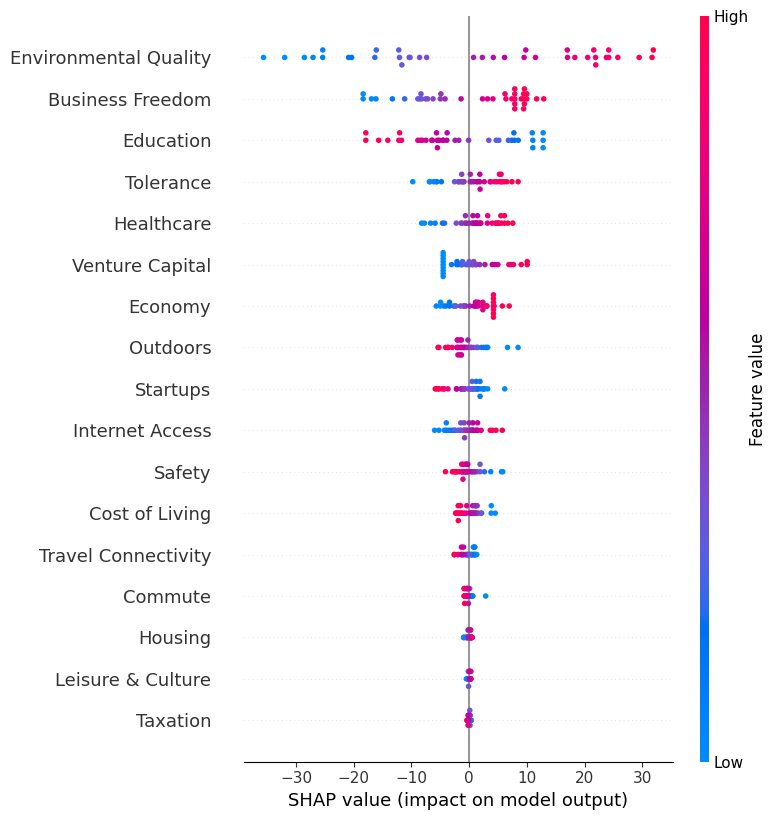

In [49]:
reg = LinearRegression().fit(train_X, train_y)

explainer = shap.Explainer(reg, train_X)
shap_values = explainer(test_X)

shap.summary_plot(shap_values, test_X)

Видим сходство с результатами F критерия.

In [51]:
X_shap_result = ['Environmental Quality','Business Freedom', 'Education', 'Tolerance', 'Healthcare', 'Venture Capital', 
                 'Economy', 'Outdoors', 'Startups', 'Internet Access', 'Safety']
                


In [53]:
X_shap = X[['Environmental Quality','Business Freedom', 'Education', 'Tolerance', 'Healthcare', 'Venture Capital', 
                 'Economy', 'Outdoors', 'Startups', 'Internet Access', 'Safety']]

In [54]:
train_X, test_X, train_y, test_y = train_test_split(X_shap, y, test_size=0.2, random_state=42)

In [55]:
reg_shap = LinearRegression().fit(train_X , train_y)

In [56]:
predictions = reg_shap.predict(test_X)

In [57]:
r2 = r2_score(test_y, predictions) 
r2 #увеличился

0.7900263477159484

In [58]:
mean_squared_error(reg_shap.predict(test_X), test_y) #уменьшился

305.2869313817167

In [59]:
mean_squared_error(reg_shap.predict(train_X), train_y) #увеличился

195.87510697312885

<Axes: >

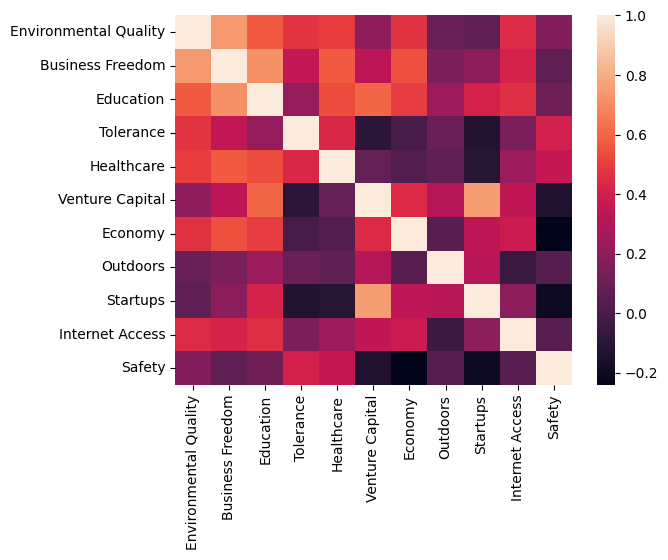

In [60]:
corr = X_shap.corr(method='spearman') 
sns.heatmap(corr)

Мультиколлинеарность снизилась, но все еще сохраняется. Попробуем избавиться от неё.

In [61]:
X_shap_2 = X[['Environmental Quality', 'Education', 'Tolerance', 'Healthcare', 'Venture Capital', 
                 'Economy', 'Outdoors', 'Startups', 'Internet Access', 'Safety']]

In [65]:
train_X, test_X, train_y, test_y = train_test_split(X_shap_2, y, test_size=0.2, random_state=42)


In [66]:
reg_shap_2 = LinearRegression().fit(train_X , train_y)

In [67]:
predictions = reg_shap_2.predict(test_X)

In [68]:
r2 = r2_score(test_y, predictions) 
r2 

0.7882271047782985

In [71]:
mean_squared_error(reg_shap_2.predict(test_X), test_y) 

307.9029041443484

In [72]:
mean_squared_error(reg_shap_2.predict(train_X), train_y) 

216.19815700719076

Данный вариант оказался хуже

eli5

In [74]:
X = df.drop(["Quality of Life Index", "UA_Name", "UA_Country", "UA_Continent"], axis=1)
y = df[["Quality of Life Index"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
import eli5
from eli5.sklearn import PermutationImportance

In [76]:
reg = LinearRegression().fit(train_X, train_y)

In [77]:
perm = PermutationImportance(reg, random_state=42).fit(test_X, test_y)

In [78]:
eli5.show_weights(perm, feature_names=list(test_X.columns))

Weight,Feature
0.7306 ± 0.2305,Environmental Quality
0.1755 ± 0.1101,Business Freedom
0.0611 ± 0.0323,Venture Capital
0.0399 ± 0.0266,Healthcare
0.0245 ± 0.0443,Education
0.0213 ± 0.0400,Economy
0.0152 ± 0.0127,Internet Access
0.0063 ± 0.0169,Cost of Living
0.0051 ± 0.0197,Safety
0.0019 ± 0.0147,Outdoors


In [80]:
X_eli = X[['Environmental Quality','Business Freedom', 'Venture Capital', 'Healthcare', 'Education',
           'Economy', 'Internet Access', 'Cost of Living', 'Outdoors', 'Safety']]



In [81]:
train_X, test_X, train_y, test_y = train_test_split(X_eli, y, test_size=0.2, random_state=42)

In [82]:
reg_eli = LinearRegression().fit(train_X, train_y)

In [83]:
predictions = reg_eli.predict(test_X)

In [85]:
r2 = r2_score(test_y, predictions) 
r2

0.8129939085996398

Максимальный r2 из полученных

In [86]:
mean_squared_error(reg_eli.predict(test_X), test_y) 

271.8937122457295

In [ ]:
Минимальная MSE из полученных

In [87]:
mean_squared_error(reg_eli.predict(train_X), train_y) 

209.0576343191283

<Axes: >

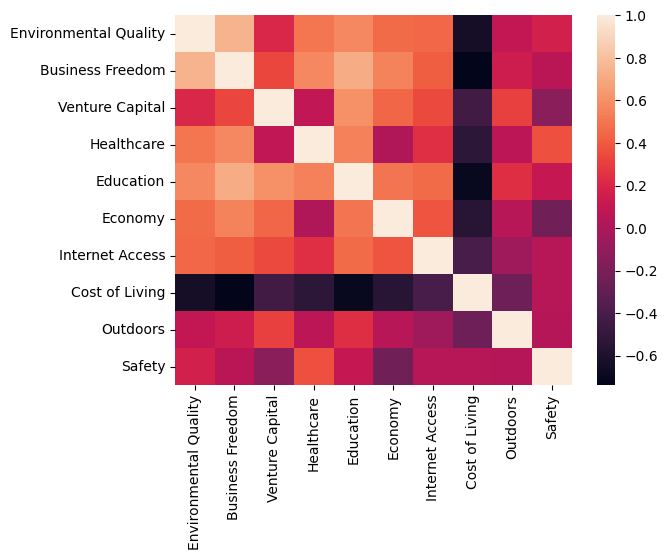

In [88]:
corr = X_eli.corr(method='spearman') 
sns.heatmap(corr)

reg_eli показала лучшие r^2 и MSE, но остается актуальной проблема мультиколлинеарности.